# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

- In this project,we will predict real estate prices using artificial neural networks.
- Dataset includes house sale prices for King County in USA and homes that are sold in the time period between may 2014 and may 2015
- Columns:
  - date : Date house was sold
  - price :Price is prediction target
  - bedrooms:Number of bedrooms
  - bathrooms:Number of bathromms
  - sqft_living:square footage of the home
  - sqft_lot: square footage of the lot
  - floors: Total floors(levels) in house
  - waterfront: House which has a view to waterfront



# TASK #2: IMPORT LIBRARIES AND DATASETS

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [7]:
df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# TASK #3: PERFORM DATA VISUALIZATION

<Axes: xlabel='sqft_living', ylabel='price'>

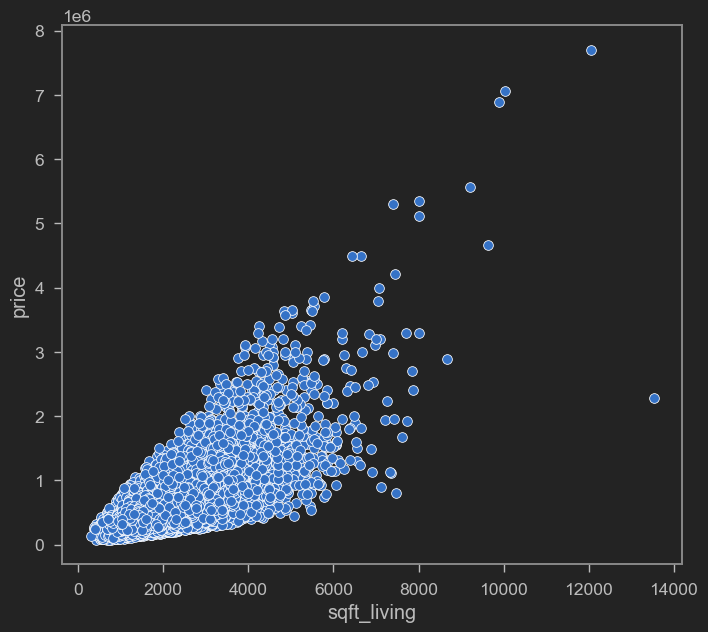

In [23]:
sns.scatterplot(x='sqft_living',y='price' , data=df)

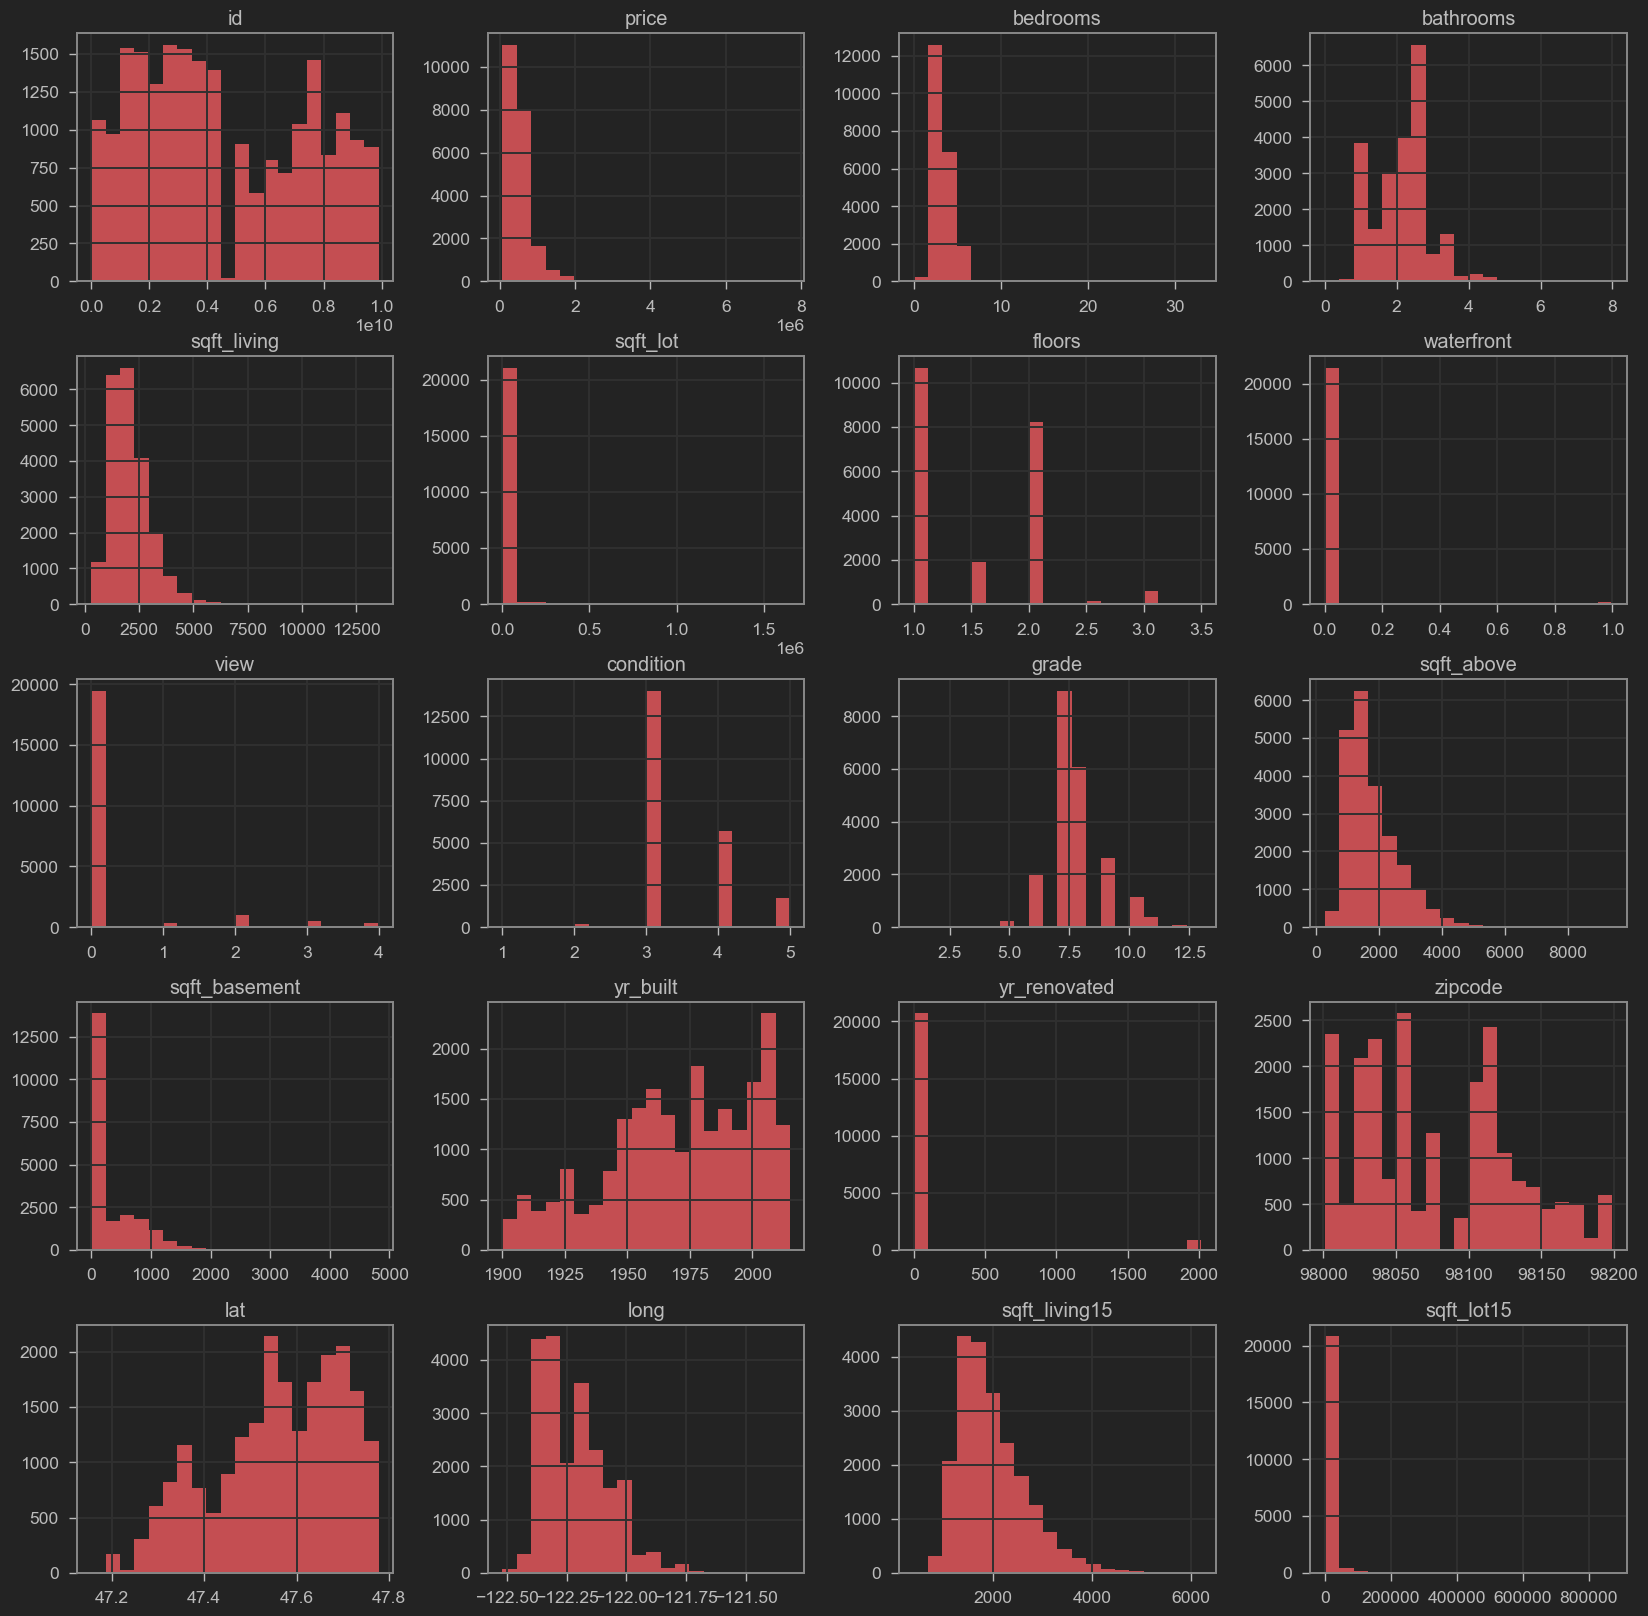

In [24]:
df.hist(bins=20,figsize=(20,20),color='r')
plt.show()

In [25]:
df_corr=df.drop('date', axis=1,)

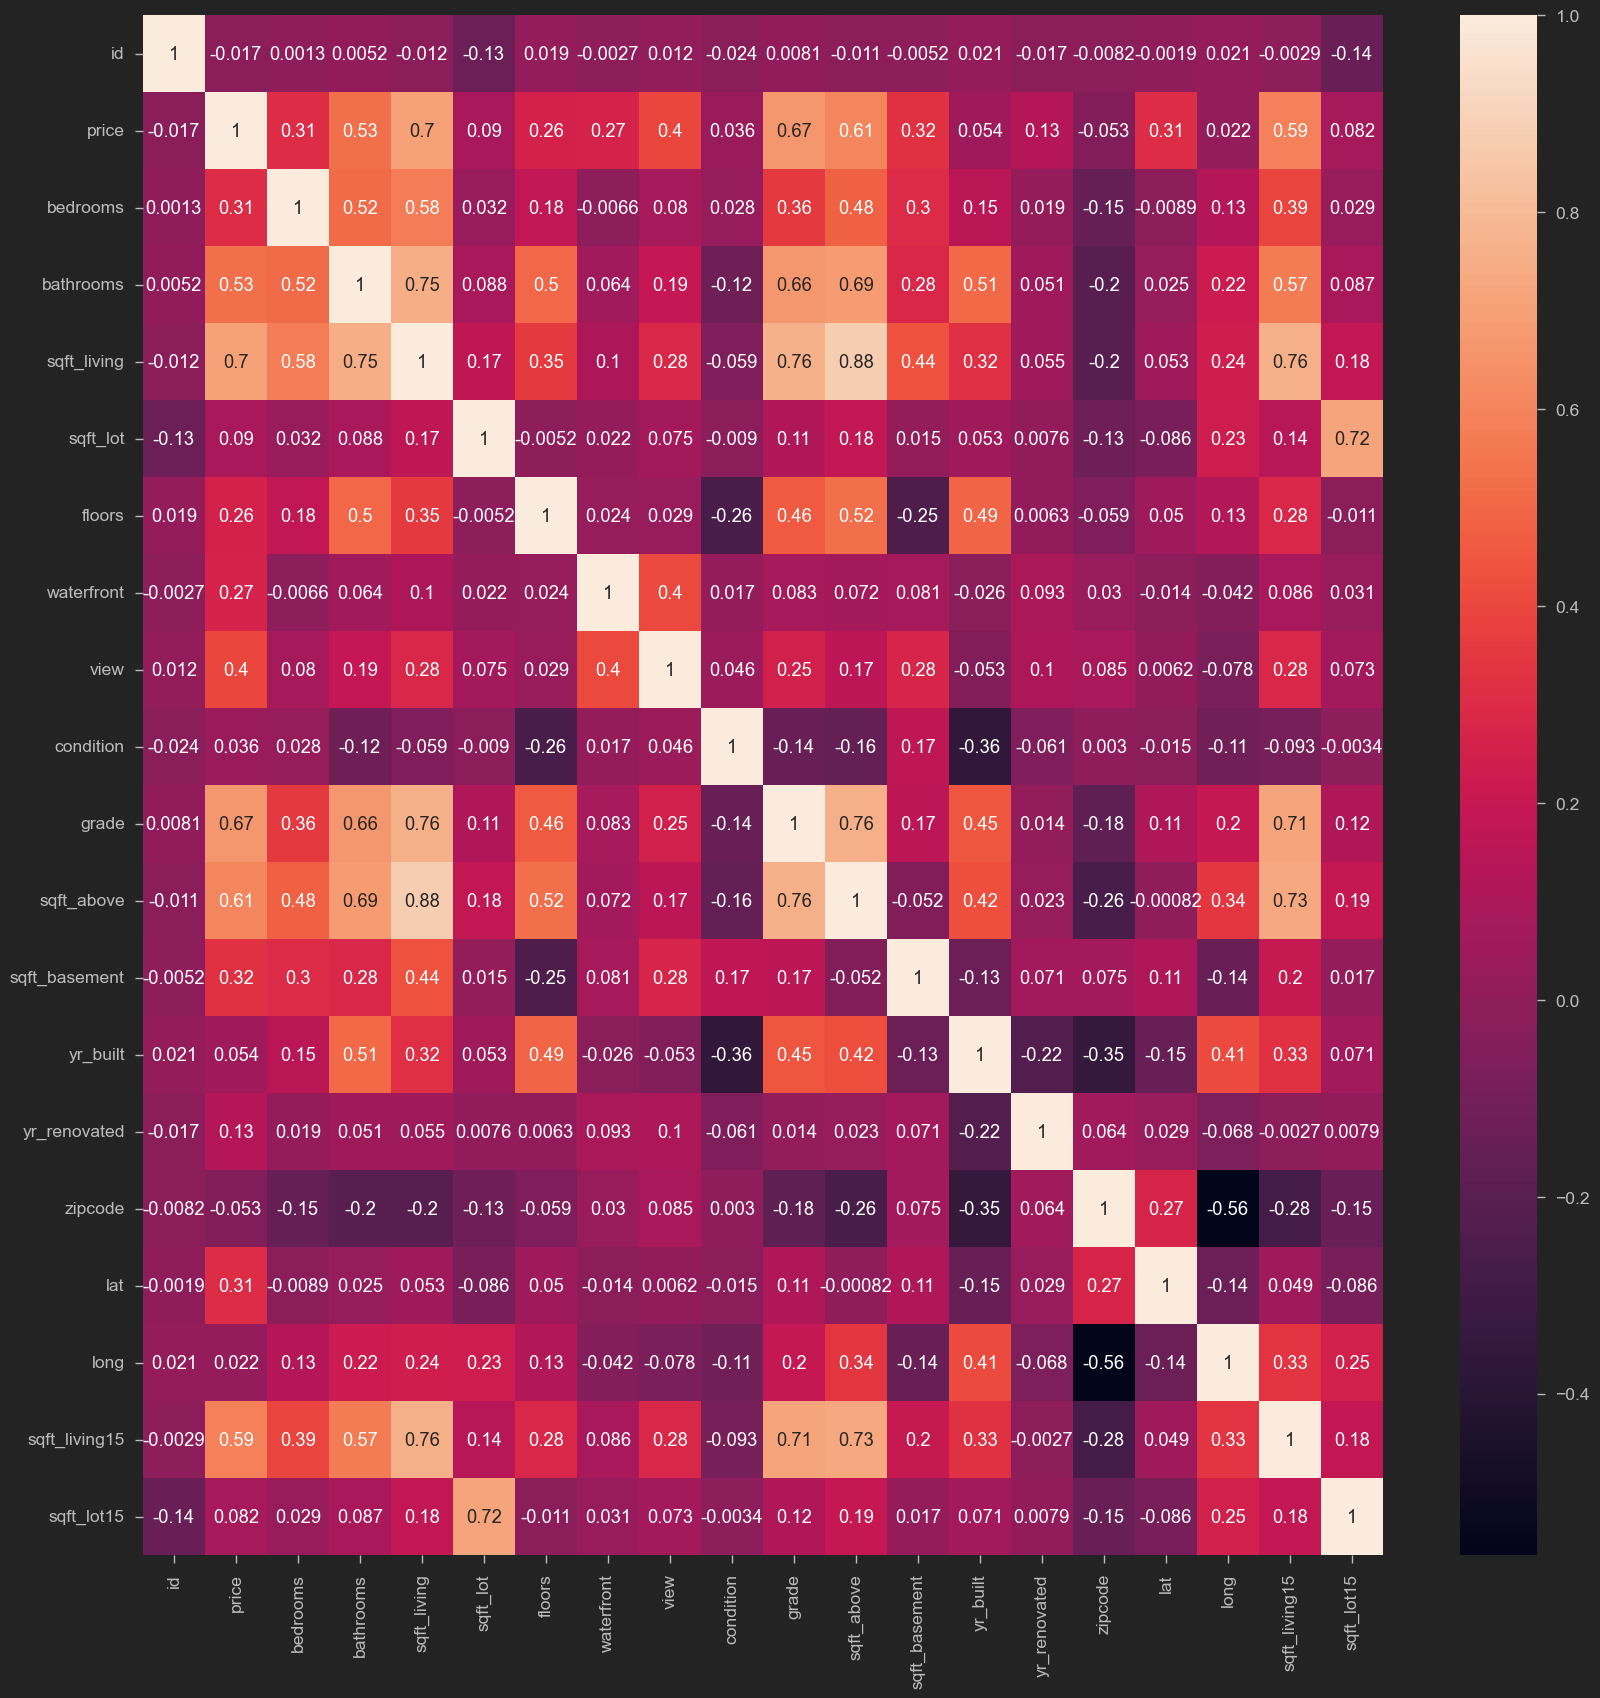

In [26]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

In [27]:
house_df_sample = df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [28]:
house_df_sample.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987


# TASK #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING

In [31]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [32]:
X =df[selected_features]

In [33]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [34]:
y = df['price']

In [35]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [36]:
X.shape

(21613, 7)

In [37]:
y.shape

(21613,)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [39]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [40]:
X_scaled.shape

(21613, 7)

In [41]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [42]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [43]:
y = y.values.reshape(-1,1)

In [44]:
y_scaled = scaler.fit_transform(y)

In [45]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# TASK #5: TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.25)

In [48]:
X_train.shape

(16209, 7)

In [49]:
X_test.shape

(5404, 7)

In [50]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(200,input_dim=7,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))


C:\Users\SREENATH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,001 (949.22 KB)

 Trainable params: 243,001 (949.22 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [53]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - val_loss: 9.3565e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - val_loss: 9.3233e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.3151e-04 - val_loss: 0.0012
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 12/100
260/260 ━━━━━━━━

# TASK #6: EVALUATE TRAINED DEEP LEARNING MODEL PERFORMANCE 

In [57]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

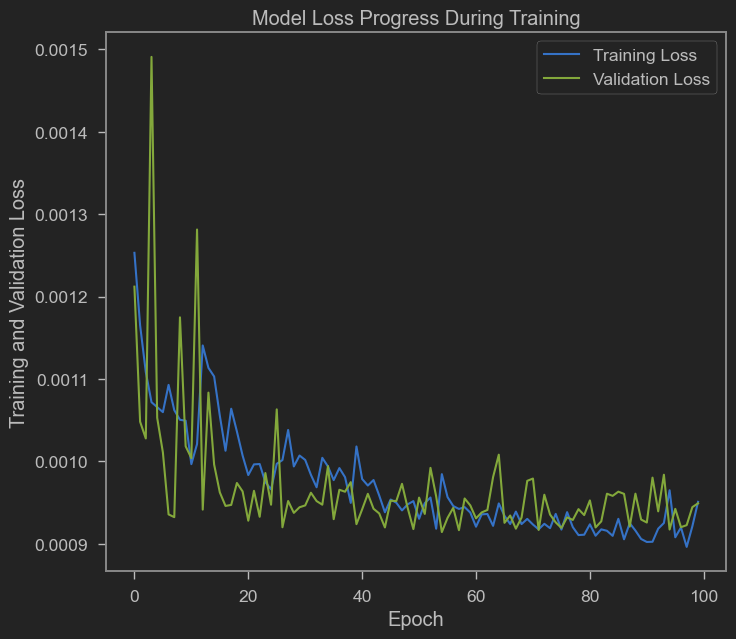

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [59]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


array([[118244.]], dtype=float32)

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0, 0.5, 'True Values')

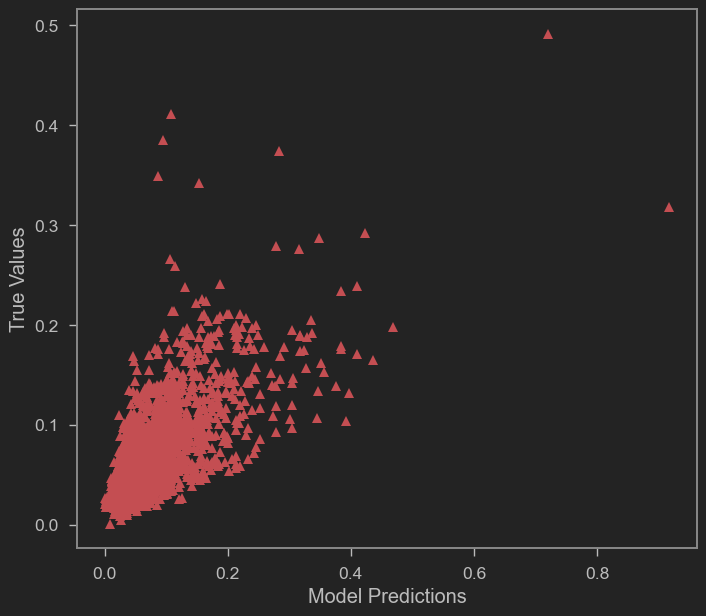

In [60]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [61]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

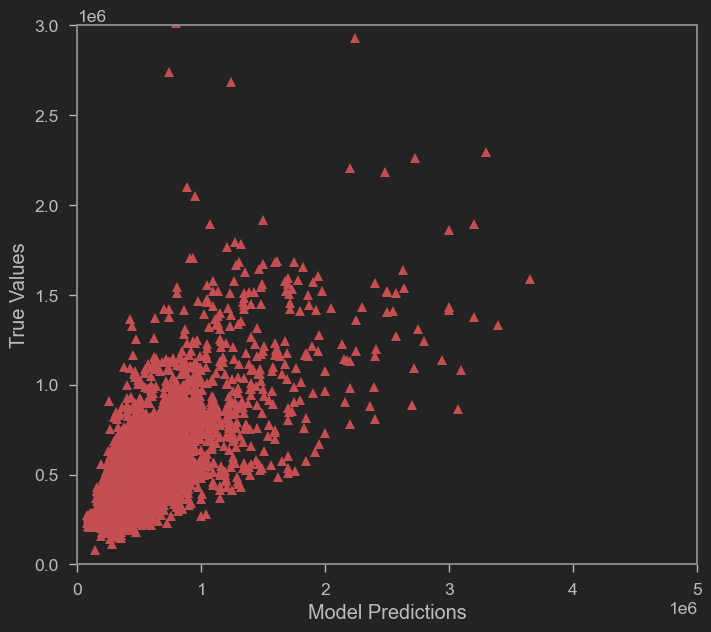

In [62]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [63]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [64]:
k

7

In [65]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 252092.784 
MSE = 63550771878.5165 
MAE = 155863.72875560928 
R2 = 0.5113882222301136 
Adjusted R2 = 0.5107543670699228


# TASK #7. TRAIN AND EVALUATE A DEEP LEARNING MODEL WITH INCREASED NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [67]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
y = df['price']

In [70]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [71]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\SREENATH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [73]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.9342e-04 - val_loss: 8.6034e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6792e-04 - val_loss: 7.4492e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9093e-04 - val_loss: 6.9087e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5305e-04 - val_loss: 6.7546e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7315e-04 - val_loss: 6.5264e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9708e-04 - val_loss: 6.2547e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0046e-04 - val_loss: 6.0264e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6736e-04 - val_loss: 7.3608e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0

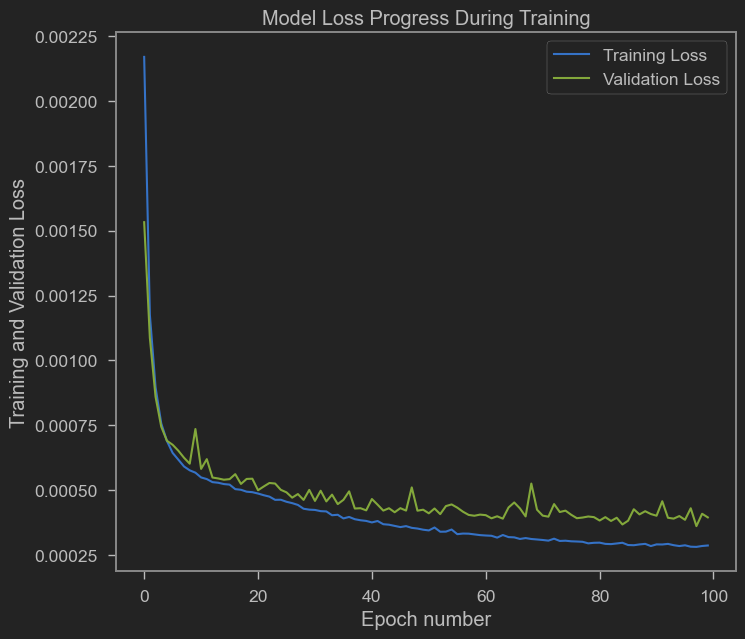

In [74]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


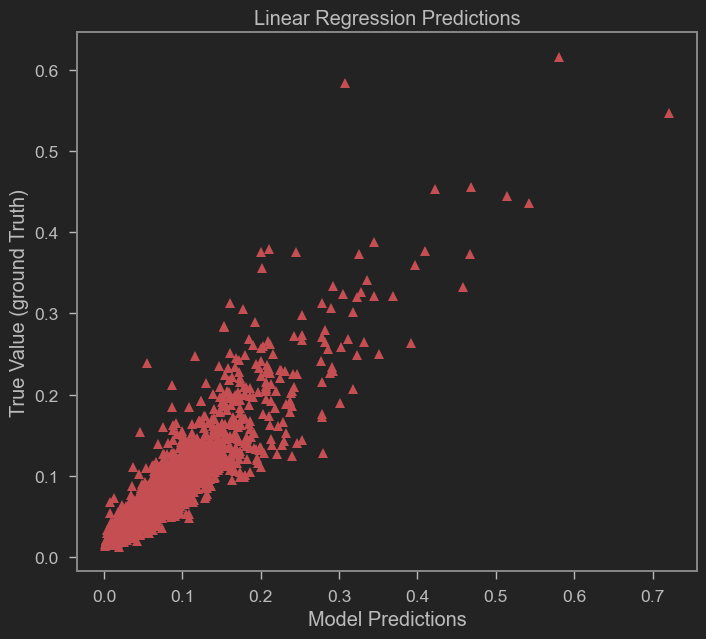

In [75]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [76]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 144654.158 
MSE = 20924825331.06889 
MAE = 93506.3888092154 
R2 = 0.8324758026538971 
Adjusted R2 = 0.8322584806780959



- **Change the architecture of the network to increase the coefficient of determination to at least 0.86.**  

In [179]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(200,activation='relu'))

model.add(Dense(1, activation = 'linear'))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0015 - val_loss: 6.7858e-04
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5136e-04 - val_loss: 5.8356e-04
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0579e-04 - val_loss: 5.2807e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4779e-04 - val_loss: 5.3532e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7694e-04 - val_loss: 4.7615e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6755e-04 - val_loss: 4.7971e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5498e-04 - val_loss: 4.6000e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0914e-04 - val_loss: 5.8331e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9305e-04 - val_loss: 4.4855e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9855e-04 - val_loss: 4.4217e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

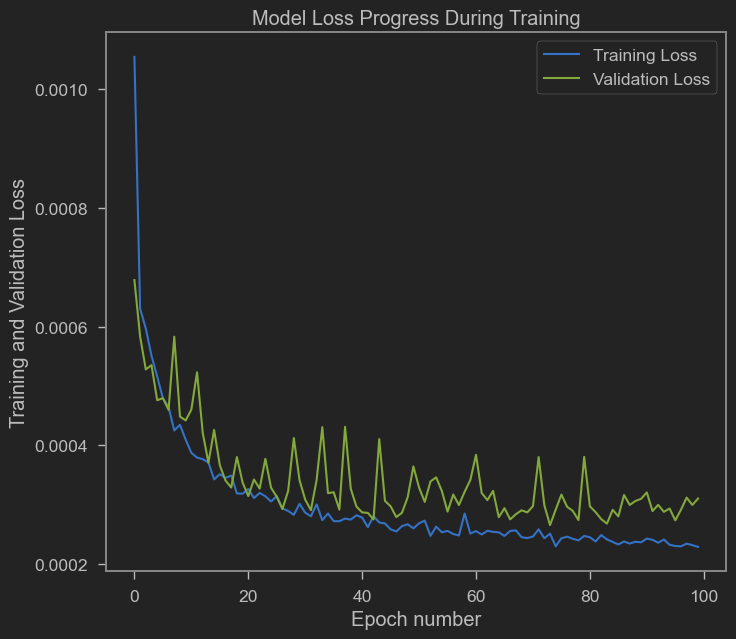

In [181]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


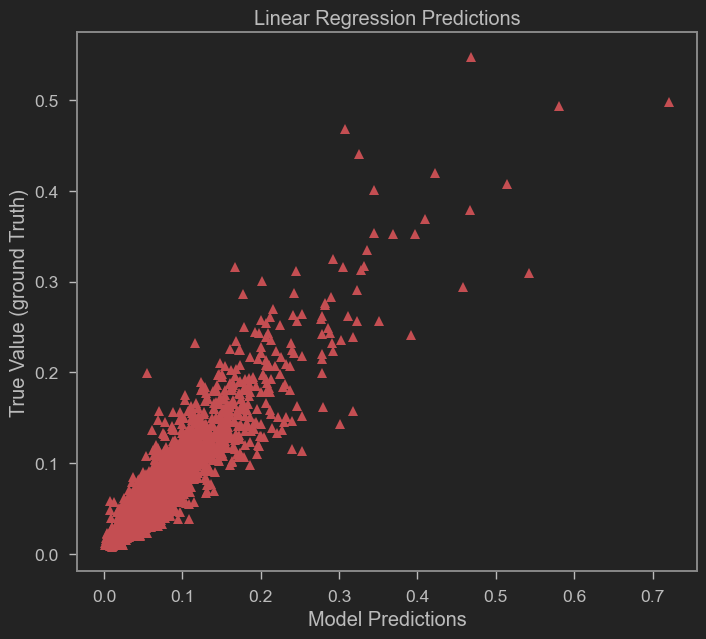

In [183]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [185]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [187]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 130702.5 
MSE = 17083143549.469738 
MAE = 76913.68049419412 
R2 = 0.8632323153960118 
Adjusted R2 = 0.8630548925286604


# END